1. Import pandas as pd, numpy as np, matplotlib.pyplot as plt and seaborn as sns:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the "data_student.csv" file using read_csv() (Hint: indicate ';' as the seperator and indicate not to read in index column) and check its head:

In [46]:
student_data = pd.read_csv('data_student.csv',sep=';',index_col=0)
student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Mjob,reason,traveltime,studytime,freetime,health,absences,G2,G3
0,GP,F,18,GT3,A,4,at_home,course,2,2,3,3,6,6,6
1,GP,F,17,GT3,T,1,at_home,course,1,2,3,3,4,5,6
2,GP,F,15,LE3,T,1,at_home,other,1,2,3,3,10,8,10
3,GP,F,15,GT3,T,4,health,home,1,3,2,5,2,14,15
4,GP,F,16,GT3,T,3,other,home,1,2,3,5,4,10,10


3. Get general information about DataFrame:

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Mjob        395 non-null    object
 7   reason      395 non-null    object
 8   traveltime  395 non-null    int64 
 9   studytime   395 non-null    int64 
 10  freetime    395 non-null    int64 
 11  health      395 non-null    int64 
 12  absences    395 non-null    int64 
 13  G2          395 non-null    int64 
 14  G3          395 non-null    int64 
dtypes: int64(9), object(6)
memory usage: 49.4+ KB


4. Plot the number of students for each school and categorize it by sex:

Text(0, 0.5, 'Number of Students')

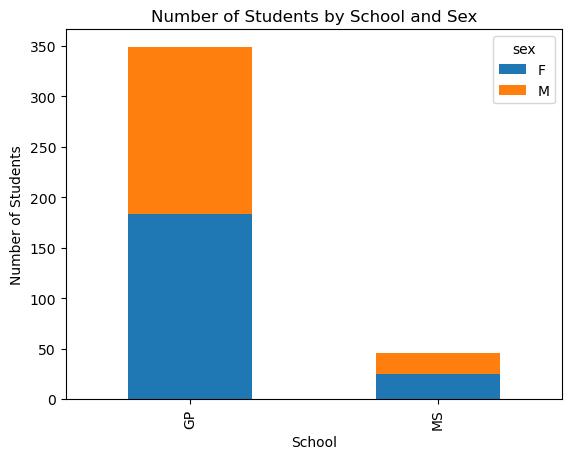

In [6]:
grouped_df = student_data.groupby(['school', 'sex']).size().unstack()
grouped_df.plot(kind='bar', stacked=True)
plt.title('Number of Students by School and Sex')
plt.xlabel('School')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

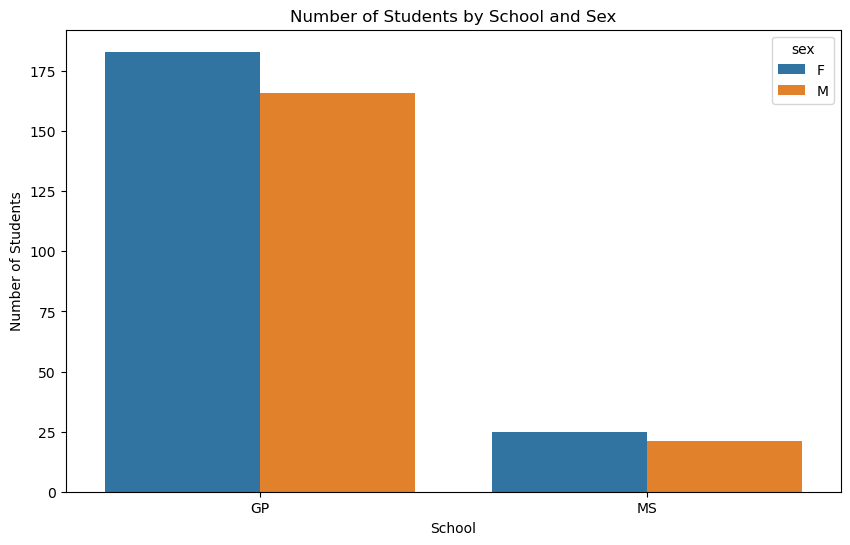

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=student_data, x='school', hue='sex')
plt.title('Number of Students by School and Sex')
plt.xlabel('School')
plt.ylabel('Number of Students')
# plt.legend(title='Sex', loc='upper right')

5. Plot age distribution of the students (include kde):

C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\1317058698.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_data['age'], kde=True)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

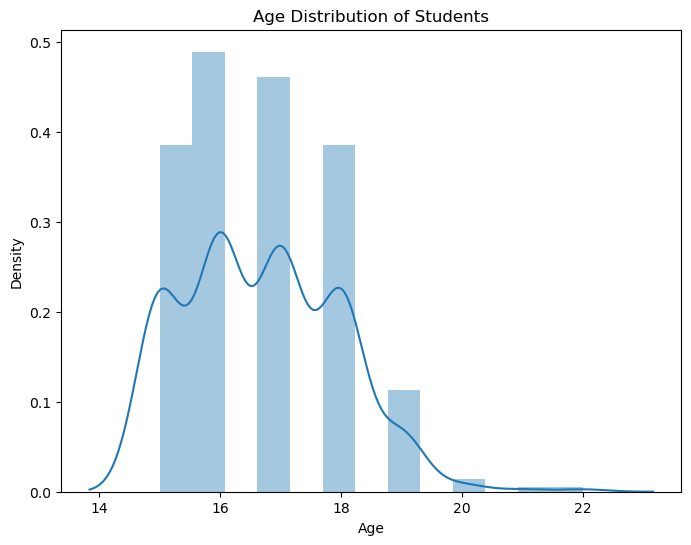

In [16]:
plt.figure(figsize=(8, 6))
sns.distplot(student_data['age'], kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Density')

6. Plot average of students for each school:

Text(0, 0.5, 'Average Number of Students')

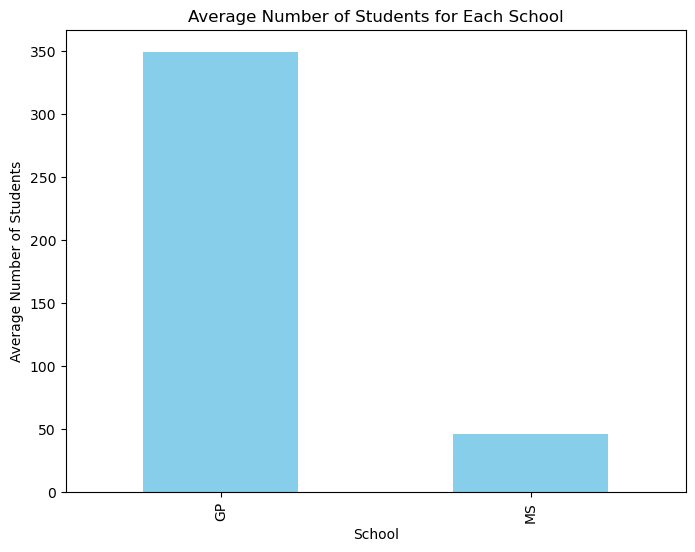

In [20]:
avg_students_per_school = student_data.groupby('school').size().mean()
plt.figure(figsize=(8, 6))
student_data.groupby('school').size().plot(kind='bar', color='skyblue')
plt.title('Average Number of Students for Each School')
plt.xlabel('School')
plt.ylabel('Average Number of Students')

Text(0, 0.5, 'Average Number of Students')

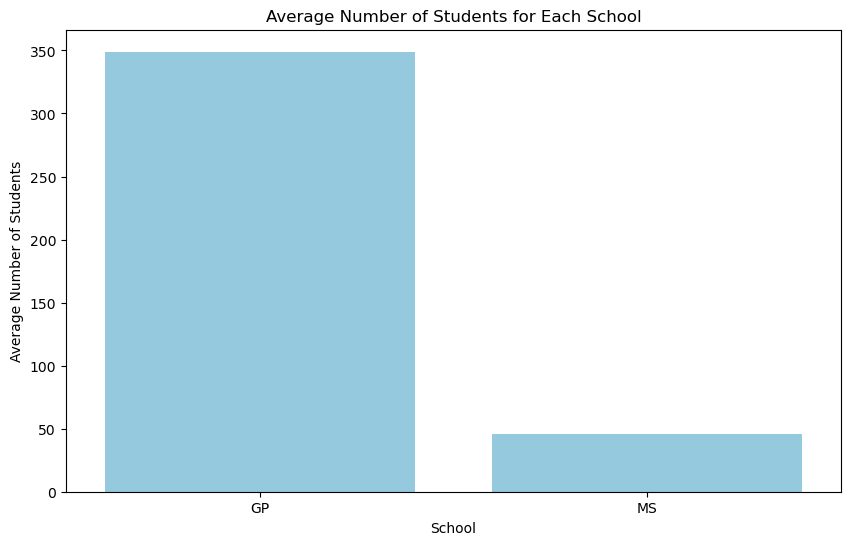

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=student_data, x=student_data.groupby('school').size().index, y=student_data.groupby('school').size().values, color='skyblue')
plt.title('Average Number of Students for Each School')
plt.xlabel('School')
plt.ylabel('Average Number of Students')

7. Plot the quartiles of final grade (G3) of the students catogorized by mother's education (Medu):
Hint: boxplot
Info:

0 - None

1 - primary education (4th grade),

2 – 5th to 9th grade,

3 – secondary education

4 – higher education

Text(0, 0.5, 'Final Grade (G3)')

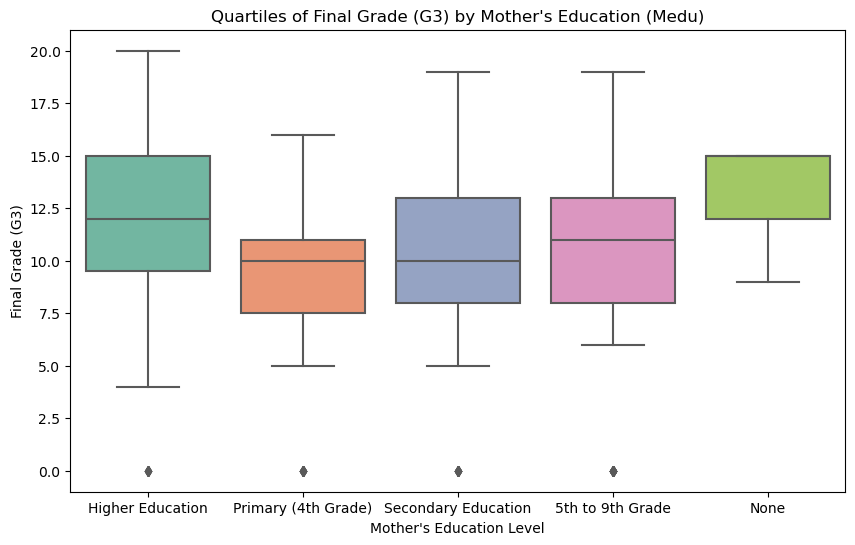

In [22]:
medu_mapping = {
    0: 'None',
    1: 'Primary (4th Grade)',
    2: '5th to 9th Grade',
    3: 'Secondary Education',
    4: 'Higher Education'
}
student_data['Medu'] = student_data['Medu'].map(medu_mapping)
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_data, x='Medu', y='G3', palette='Set2')
plt.title("Quartiles of Final Grade (G3) by Mother's Education (Medu)")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade (G3)")

8. Plot probability density with regards to final grade (G3) and mother's job (Mjob) and consider sex by selecting split = True:
Hint: violinplot

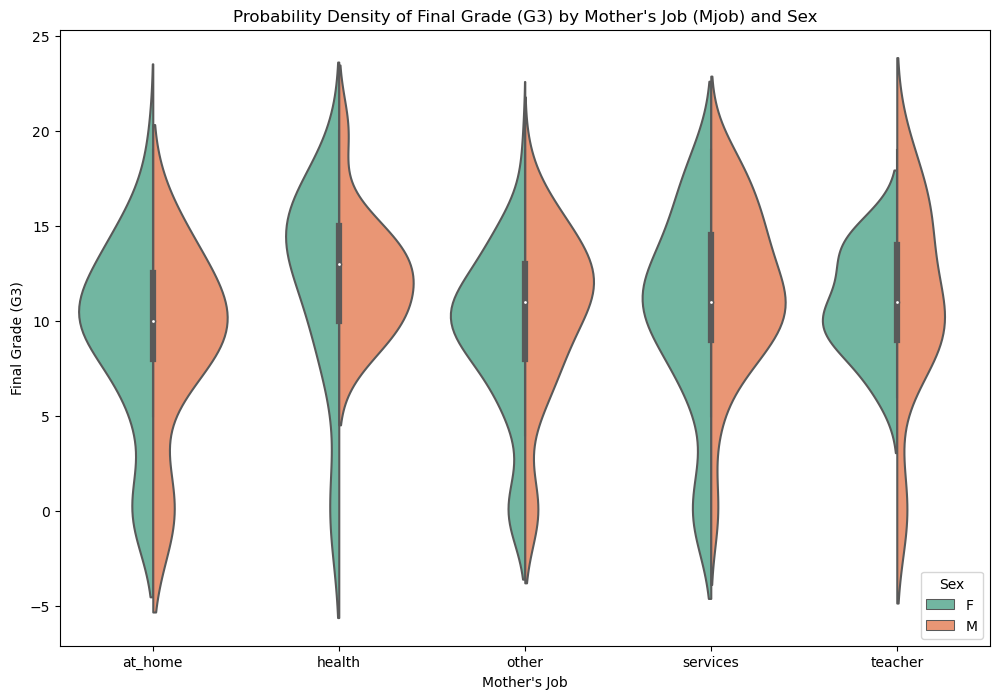

In [25]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=student_data, x='Mjob', y='G3', hue='sex', split=True, palette='Set2')
plt.title("Probability Density of Final Grade (G3) by Mother's Job (Mjob) and Sex")
plt.xlabel("Mother's Job")
plt.ylabel("Final Grade (G3)")
plt.legend(title='Sex',loc='lower right')

9. Plot density distribution of the grades (both G2,G3 on the same canvas) with regards to health but this time we want to see every data as a point in our plot:
Hint: swarm plot, subplot
Info: health status (numeric: from 1 - very bad to 5 - very good)

C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\861150417.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=student_data, x='health', y='G2', ax=axes[0], palette='Set1')
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, User

Text(665.7676767676767, 0.5, 'G3 Grade')

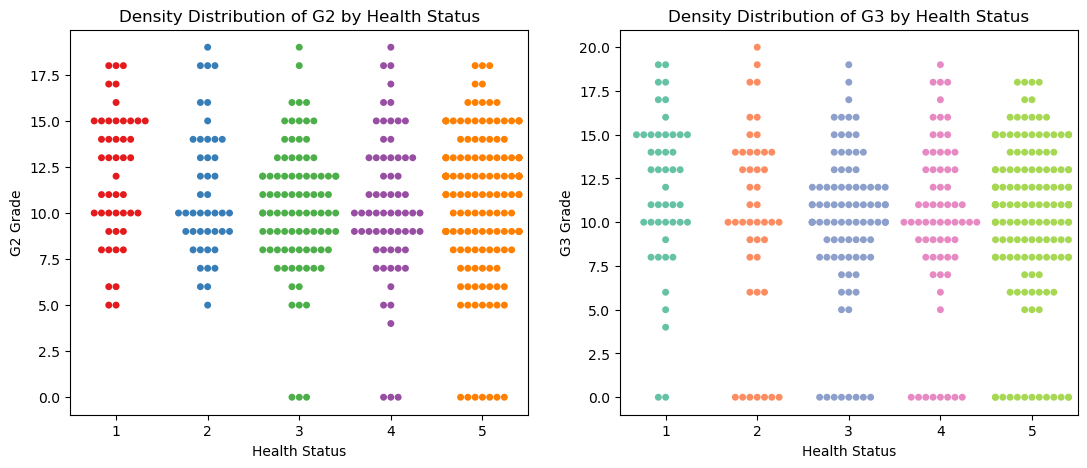

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.swarmplot(data=student_data, x='health', y='G2', ax=axes[0], palette='Set1')
axes[0].set_title('Density Distribution of G2 by Health Status')
axes[0].set_xlabel('Health Status')
axes[0].set_ylabel('G2 Grade')

# Plot swarmplot for G3
sns.swarmplot(data=student_data, x='health', y='G3', ax=axes[1], palette='Set2')
axes[1].set_title('Density Distribution of G3 by Health Status')
axes[1].set_xlabel('Health Status')
axes[1].set_ylabel('G3 Grade')

10. Do the same for the absences and travel time (single plot is enough):

C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\3296430040.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=student_data, x='traveltime', y='absences', palette='Set1')
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

Text(91.97222222222221, 0.5, 'Absences')

C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


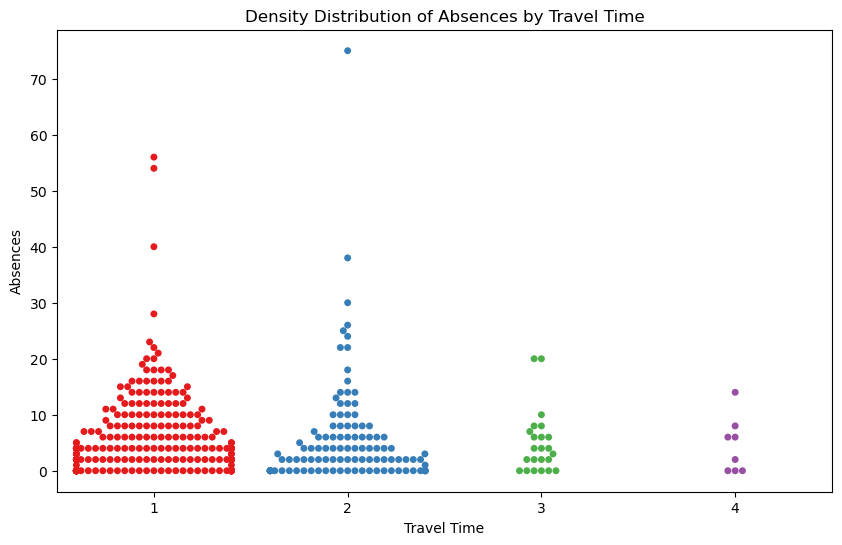

In [41]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=student_data, x='traveltime', y='absences', palette='Set1')
plt.title('Density Distribution of Absences by Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Absences')

11. Plot the final grade (G3) with respect to parental status(Pstatus) and family size (famsize) using FacetGrid and distplot (set kde=False):
Info:

LE3 - less than and equal to 3

GT3 - greater than 3

A - Apart

T - Together

C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Mahal

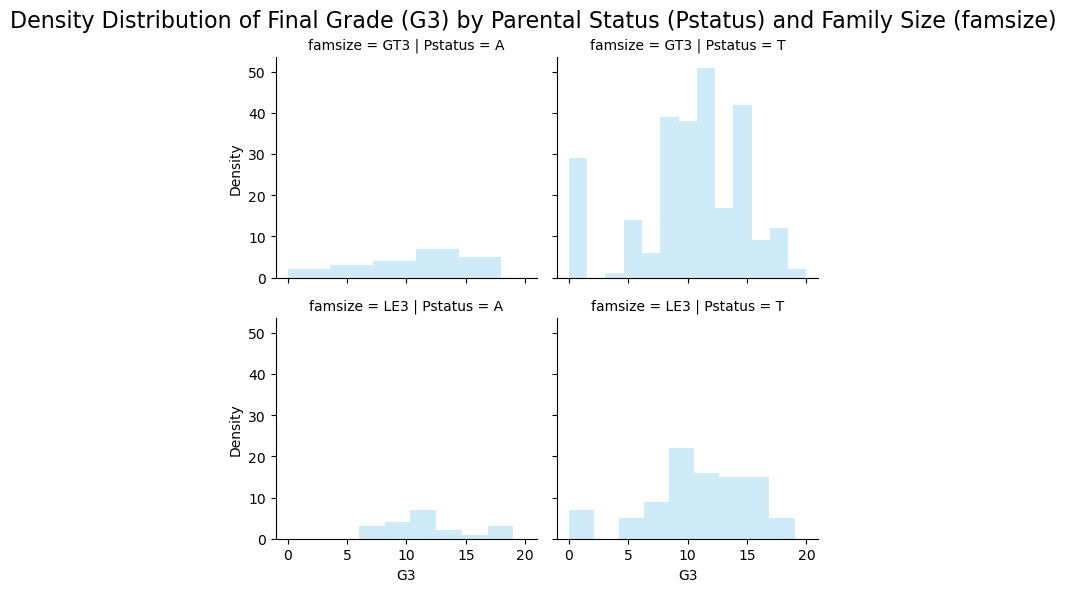

In [59]:
student_data = pd.read_csv('data_student.csv',sep=';',index_col=0)
student_data['Pstatus'].replace({'A': 'Apart', 'T': 'Together'})
student_data['famsize'].replace({'LE3': 'Less than or equal to 3', 'GT3': 'Greater than 3'})
g = sns.FacetGrid(student_data, col='Pstatus', row='famsize')
g.map(sns.distplot, 'G3', kde=False, color='skyblue')
g.set_axis_labels("G3", "Density")
g.fig.suptitle("Density Distribution of Final Grade (G3) by Parental Status (Pstatus) and Family Size (famsize)", size=16)
plt.subplots_adjust(top=0.9)

12.Plot a categorical relationship between study time (studytime) and mean of final grade (G3) and categorize by parental status:
Hint: barplot

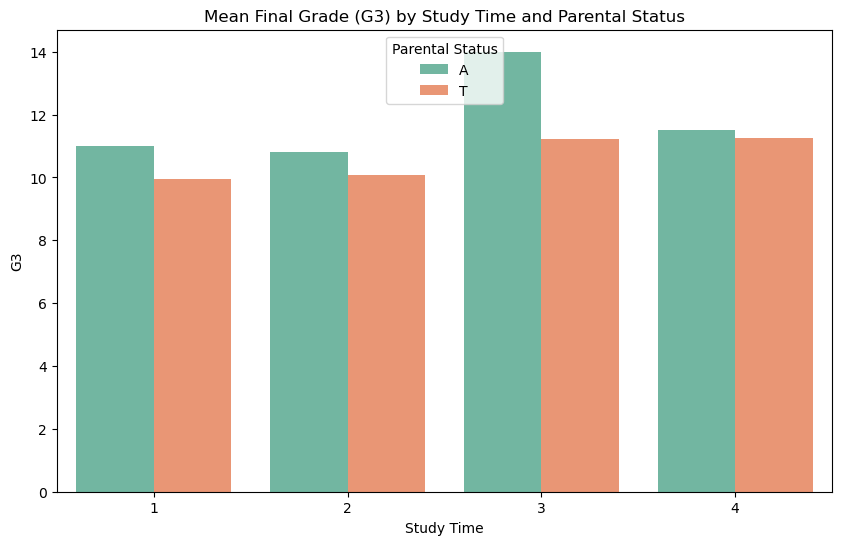

In [64]:
pstatus_mapping = {'A': 'Apart', 'T': 'Together'}
mean_grade_by_studytime_pstatus = student_data.groupby(['studytime', 'Pstatus'])['G3'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_grade_by_studytime_pstatus, x='studytime', y='G3', hue='Pstatus', palette='Set2')
plt.title('Mean Final Grade (G3) by Study Time and Parental Status')
plt.xlabel('Study Time')
plt.ylabel('G3')
plt.legend(title='Parental Status',loc='upper center')

13. Plot the relationship between max. midterm grade (G2) and reason for choosing the school (reason) and categorize it by sex:
Hint: We need bar plot but let us use catplot to reach the same plot

Text(33.273024691358025, 0.5, 'G2')

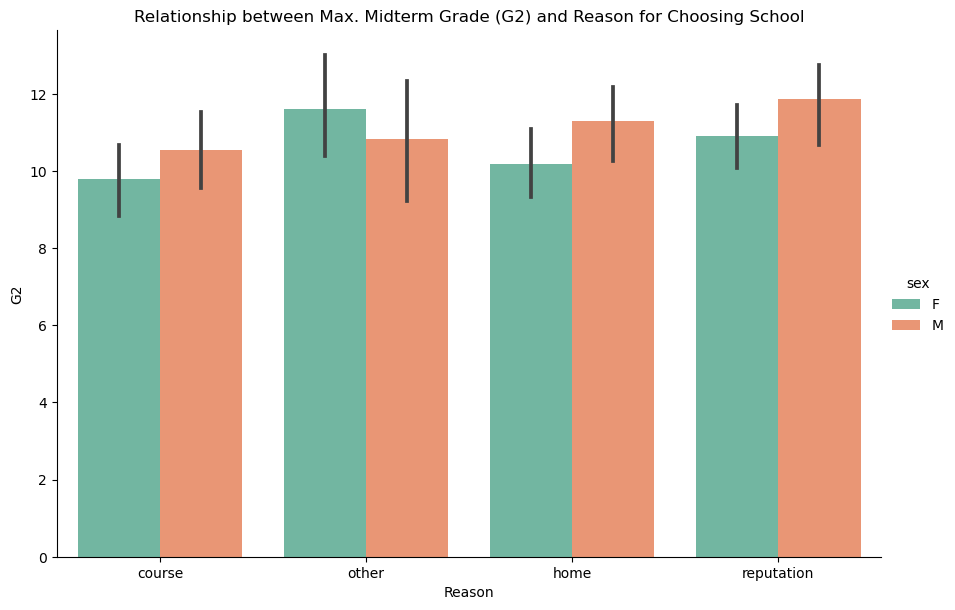

In [68]:
sns.catplot(data=student_data, x='reason', y='G2', hue='sex', kind='bar', palette='Set2', height=6, aspect=1.5)
plt.title('Relationship between Max. Midterm Grade (G2) and Reason for Choosing School')
plt.xlabel('Reason')
plt.ylabel('G2')

14. Plot the distribution of the final grade (G3) of the students using kde. Plot for both gender type on the same plot:
Hint: distplot using logical masking could come in handy.
students[students['sex']=='M']['G3']
students[students['sex']=='F']['G3']

C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\868810371.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(student_data[student_data['sex']=='M']['G3'], label='Male', shade=False)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\868810371.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(student_data[student_data['sex']=='F']['G3'], label='Female', shade=False)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarni

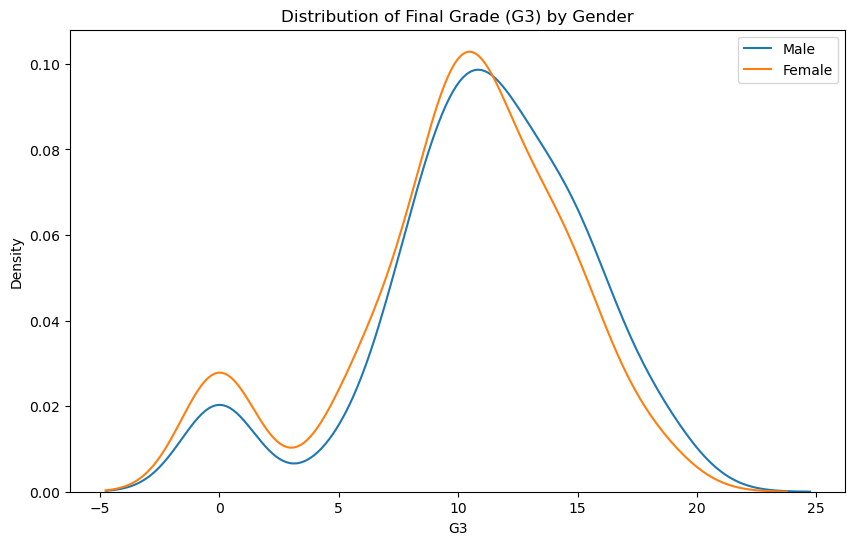

In [77]:
plt.figure(figsize=(10,6))
sns.kdeplot(student_data[student_data['sex']=='M']['G3'], label='Male', shade=False) 
sns.kdeplot(student_data[student_data['sex']=='F']['G3'], label='Female', shade=False) 
plt.title('Distribution of Final Grade (G3) by Gender')
plt.xlabel('G3')
plt.ylabel('Density')
plt.legend(loc='upper right')

15. This time plot the distribution of midterm grade (G2) using kde together for each freetime amount:
Hint: Previously we had 2 plots together. This time we have 5, so let's use for loop instead.

[3 2 4 1 5]
3
2
4
1
5


C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\1065874996.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(student_data[student_data['freetime']==freetime]['G2'], label=f'{freetime}', shade=False)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\AppData\Local\Temp\ipykernel_26016\1065874996.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(student_data[student_data['freetime']==freetime]['G2'], label=f'{freetime}', shade=False)
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\sea

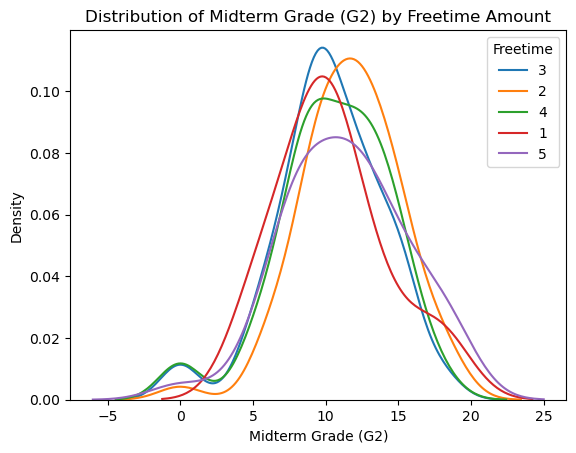

In [88]:
freetime_val=student_data['freetime'].unique()
print(freetime_val)
for freetime in freetime_val:
    print(freetime)
    sns.kdeplot(student_data[student_data['freetime']==freetime]['G2'], label=f'{freetime}', shade=False)
plt.title('Distribution of Midterm Grade (G2) by Freetime Amount')
plt.xlabel('Midterm Grade (G2)')
plt.ylabel('Density')
plt.legend(title='Freetime')

16. Create a jointplot for relationship between midterm (G2) and final grades (G3) with kde:

C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Text(62.597222222222214, 0.5, 'G3')

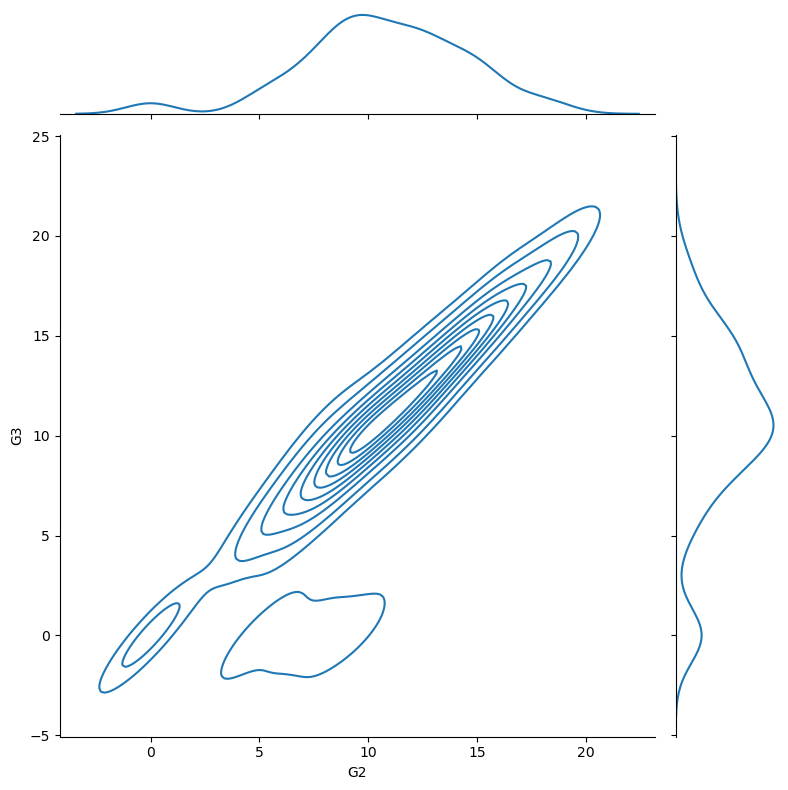

In [91]:
sns.jointplot(student_data,x='G2',y='G3',kind='kde',height=8)
plt.xlabel('G2')
plt.ylabel('G3')

17. Let's do the same for absences and midterm grade (G2) but this time with hex:

C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(37.597222222222214, 0.5, 'G3')

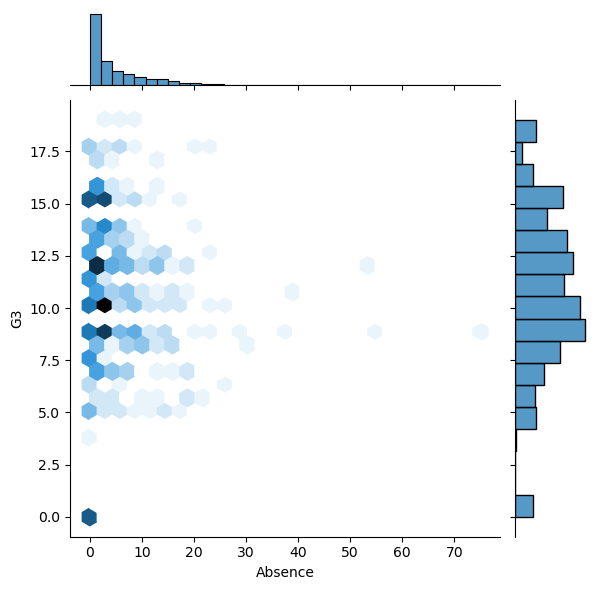

In [95]:
sns.jointplot(student_data,x='absences',y='G2',kind='hex')
plt.xlabel('Absence')
plt.ylabel('G3')

18. Plot the relationship between midterm (G2), final (G3) grade and absences:
Hint: we have more than 2 columns to pair.

C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahalakshmi.S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.02, 'Pairplot of Midterm (G2), Final (G3) Grade, and Absences')

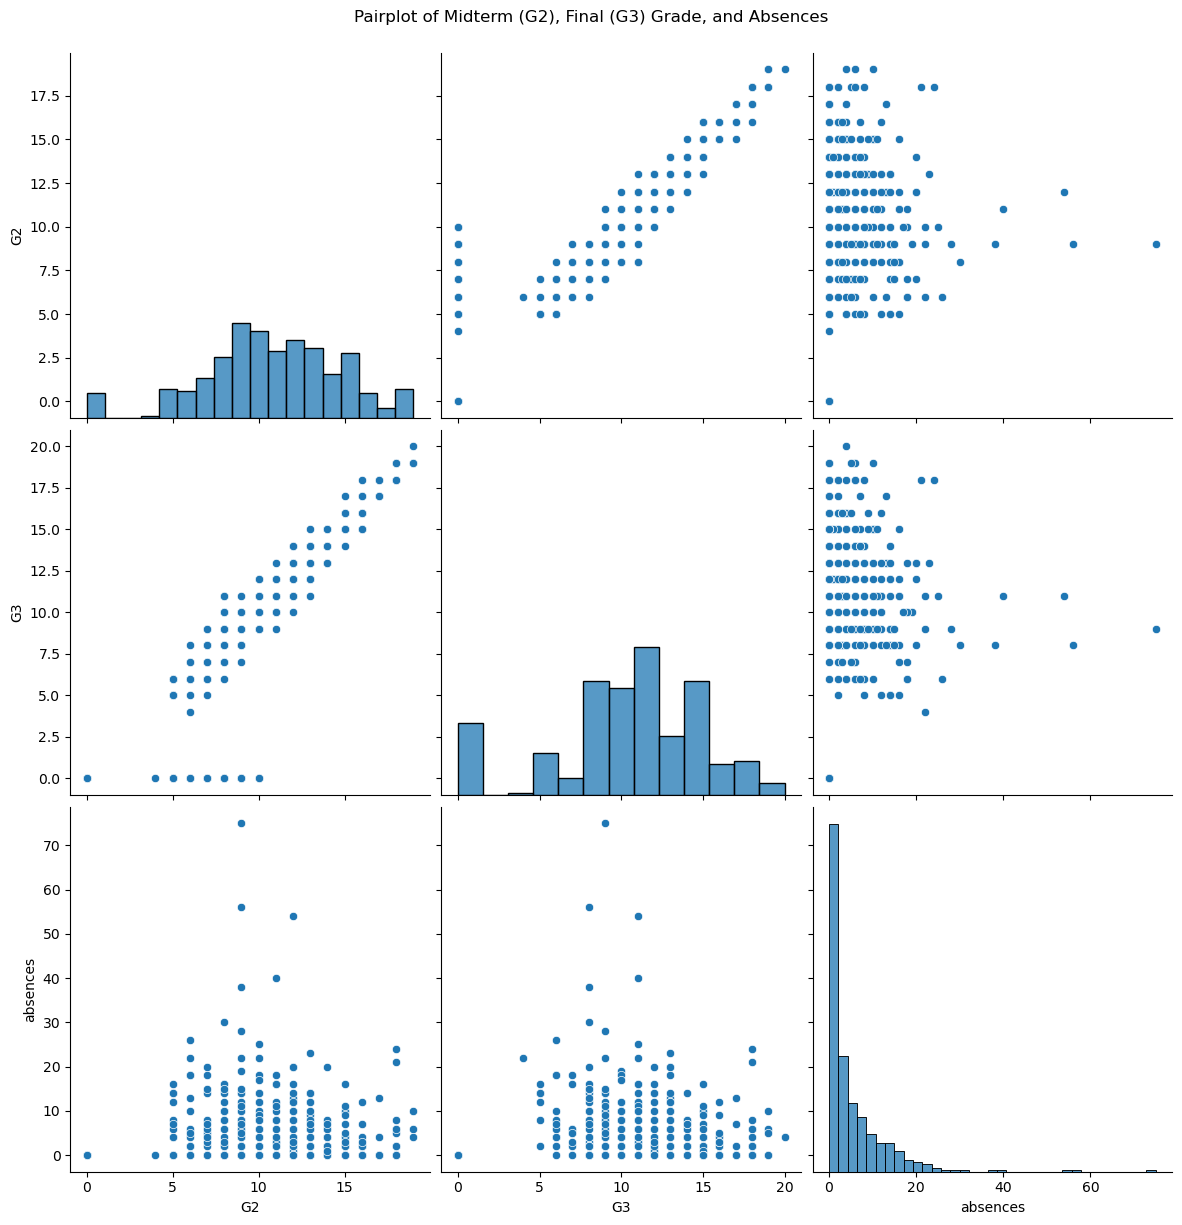

In [96]:
columns_of_interest = ['G2', 'G3', 'absences']
sns.pairplot(student_data[columns_of_interest], height=4)
plt.suptitle('Pairplot of Midterm (G2), Final (G3) Grade, and Absences', y=1.02)